# Numpyの確認課題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします．

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

---

### 問1. `ndarray`の生成

以下の2つの`ndarray`を定義しなさい．
- 観測値 `x`: 初項`0`，末項`5`，項数`100`の等差数列
- ノイズ `noise`: 標準正規分布に従う`100`個の乱数

In [2]:
first = 0
last = 5
number = 100
mu = 0
sigma = 1
x = np.arange(first,last,(last)/(number))
noise = np.random.normal(mu,sigma,number)

In [3]:
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95])

In [4]:
print(noise)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

---

ここで，真の関数 $y(x) = 3 - 5x + x^2$ を定義します．

In [5]:
def y(x):
    """真の関数"""
    return 3 - 5 * x + x ** 2

### 問2． `ndarray`の操作

問1で生成した観測値 `x` に対応する目標値 `t` を定義しなさい．

目標値 $t$ は， $t = y(x) + \epsilon$ と表されます．  ( $y$: 真の関数, $\epsilon$: ノイズ )  
実際の観測値にはどうしてもノイズ(観測誤差)が発生してしまいます．今回は，それを`noise`で再現します．

問1で観測値を100個生成したので，それぞれに対応する目標値も100個作成する必要がありますが， `for` 文は絶対使ってはいけません．

In [6]:
t = y(x) + noise
print(t)
t.shape

[ 4.76405235  3.15265721  3.48873798  4.5133932   3.90755799  0.83522212
  2.54008842  1.22114279  1.05678115  1.3630985   0.89404357  2.00677351
  1.12103773  0.29417502  0.43386323  0.14617433  1.13407907 -0.73265826
 -0.3769323  -1.70159574 -3.55298982 -0.4938814  -0.4255638  -2.16966502
  0.70975462 -3.14186567 -1.76424148 -2.11468385 -0.50722079 -0.67814123
 -2.09505257 -1.96933748 -3.32778575 -4.50829647 -2.95791215 -2.53115103
 -1.52970932 -1.62512015 -3.27732682 -3.24980275 -4.04855297 -4.46751794
 -4.79627019 -1.1767246  -3.66965218 -3.6255743  -4.46279536 -2.45000964
 -4.85389785 -3.46024028 -4.14546656 -2.8605975  -3.75080514 -4.40813218
 -3.23818223 -2.75916813 -3.09348278 -2.8250281  -3.72432209 -3.41024117
 -3.67246045 -3.30705316 -3.70314628 -4.5537826  -2.58257386 -3.08928094
 -4.24019835 -2.06471774 -3.34729836 -2.2955546  -1.52090944 -2.01851709
 -0.90059932 -3.16232582 -1.40765836 -2.37231009 -2.43079715 -2.00634966
 -1.60155253 -1.09133466 -2.16514984  0.05332649 -0

(100,)

matplotlib で可視化すると以下のようなグラフになります．
scatter → 散布図

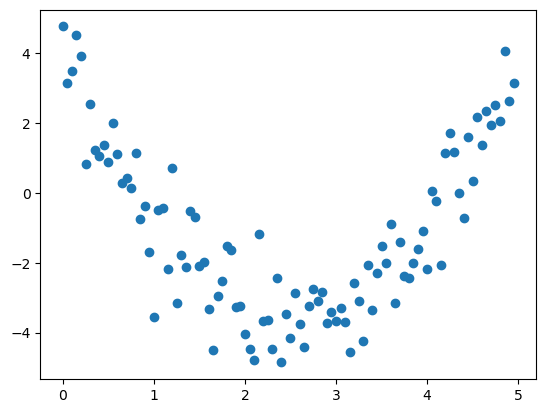

In [7]:
plt.scatter(x, t)

---

### 問3. `ndarray`の結合

以下の3つの`ndarray`を垂直方向に結合した2次元配列を転置した行列 `X` を定義しなさい．

- x0: 長さが `x` と同じで要素が全て1の`ndarray`
- x1: 観測値 `x` の各要素を1乗した`ndarray`
- x2: 観測値 `x` の各要素を2乗した`ndarray`

例： $x = (1, 2, 3)$ のとき，

$$
x_0 = (1, 1, 1)\\
x_1 = (1, 2, 3)\\
x_2 = (1, 4, 9)
$$

だから，

$$
X = \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    1 & 4 & 9
\end{array}
\right)^T
= \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{array}
\right)
$$

ちなみに，機械学習では `X` のような行列を計画行列と呼びます．

In [13]:
x_1 = np.array([list(map(int,input().split()))])
x_0 = np.array(np.power(x_1, 0))
x_2 = np.array(np.power(x_1, 2))
X = np.array([x_0,x_1,x_2]).T
print(X)
X = X.reshape(3,3)
print(X)
X.shape

[[[1 1 1]]

 [[1 2 4]]

 [[1 3 9]]]
[[1 1 1]
 [1 2 4]
 [1 3 9]]


(3, 3)

---

### 問4. 線形代数

観測値 `x, t` をもとに真の関数 `y` を2次関数で回帰しなさい．

任意の2次関数は $y(x) = w_0 + w_1 x + w_2 x^2$ と表すことができます．  
なので，パラメータのベクトル $\mathbf{w} = (w_0, w_1, w_2)$ を求めれば良いことになります．

これは以下の正規方程式から求めることができます．

$ \mathbf{w} = (X^T X)^{-1} X^T \mathbf{t} $

この式の導出はdev_data勉強会で学びます．

行列の積が多い場合は`np.dot`を使わない方が簡潔に書けます．

In [9]:
x4_1 = x
x4_0 = np.array(np.power(x, 0))
x4_2 = np.array(np.power(x, 2))
X4 = np.array([x4_0,x4_1,x4_2]).T
X4.shape

(100, 3)

In [10]:
w0,w1,w2 = np.dot(np.linalg.inv(X4.T@X4),(X4.T@t))
pred_y = w0 + w1 * x + w2 * x ** 2

---

### 結果

先ほどのグラフに真の関数(緑)と回帰曲線(赤)を重ねると以下のようになります．

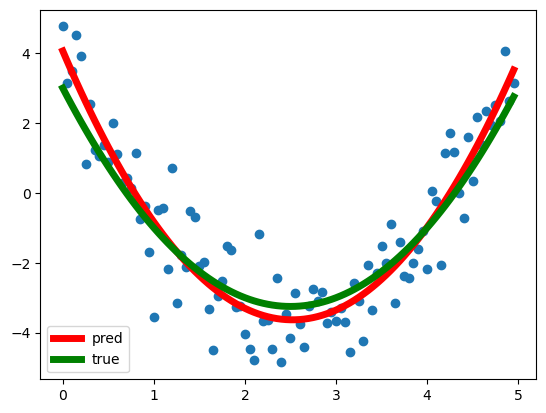

In [15]:
plt.scatter(x, t)
plt.plot(x, pred_y, linewidth=5, color="red", label="pred")
plt.plot(x, y(x), linewidth=5, color="green", label="true")
plt.legend()

今回使った手法は 真の関数 `y` の定義を変更するとその他のコードを全く変更しなくても同様に回帰することができます．

例えば以下のように変更したらその関数を回帰します．

```python
def y(x):
    """真の関数"""
    return 5 * np.sin(np.pi * x / 5)
```
dev_data勉強会で詳しくやりますが，この回帰曲線の表現力は2次までです．
カーブが2つ以上の曲線を回帰したい場合は問3の計画行列の列数を　`x3, x4...`　のように増やせば表現力が上がります．